 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/Dropbox/sipyb/Testing/S-855-3%20synthetic%20data%20for%20forged%20with%20slink.ipynb#Use-creek" data-toc-modified-id="Use-creek-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Use creek</a></span></li><li><span><a href="http://localhost:8888/notebooks/Dropbox/sipyb/Testing/S-855-3%20synthetic%20data%20for%20forged%20with%20slink.ipynb#Composition-of-creeks-using-lined" data-toc-modified-id="Composition-of-creeks-using-lined-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Composition of creeks using lined</a></span></li><li><span><a href="http://localhost:8888/notebooks/Dropbox/sipyb/Testing/S-855-3%20synthetic%20data%20for%20forged%20with%20slink.ipynb#analogue-of-iterize-for-creek" data-toc-modified-id="analogue-of-iterize-for-creek-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>analogue of iterize for creek</a></span></li><li><span><a href="http://localhost:8888/notebooks/Dropbox/sipyb/Testing/S-855-3%20synthetic%20data%20for%20forged%20with%20slink.ipynb#Transform-mapping-into-a-function" data-toc-modified-id="Transform-mapping-into-a-function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transform mapping into a function</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Dropbox/sipyb/Testing/S-855-3%20synthetic%20data%20for%20forged%20with%20slink.ipynb#example-on-creek" data-toc-modified-id="example-on-creek-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>example on creek</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Dropbox/sipyb/Testing/S-855-3%20synthetic%20data%20for%20forged%20with%20slink.ipynb#Rewriting-Christian's-functions-with-creek" data-toc-modified-id="Rewriting-Christian's-functions-with-creek-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rewriting Christian's functions with creek</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Dropbox/sipyb/Testing/S-855-3%20synthetic%20data%20for%20forged%20with%20slink.ipynb#package-everything-using-lined" data-toc-modified-id="package-everything-using-lined-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>package everything using lined</a></span></li></ul></li></ul></div>

# Use creek

In [35]:
from creek import Creek

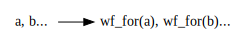

In [169]:
from ut import dgdisp

dgdisp("""
rankdir=LR
categories -> wfs_for_each_category 
categories [label="a, b..." shape=none]
wfs_for_each_category [label="wf_for(a), wf_for(b)..." shape=none]
""")

In [170]:
# Using creek
cat_map = {'a': [1,2,3], 'b': [4,5,6]}
class CatCreek(Creek):
    def data_to_obj(self, item):
         return cat_map[item]

src = 'aabbaab'
stream= CatCreek(src)


In [171]:
list(stream)

[[1, 2, 3], [1, 2, 3], [4, 5, 6], [4, 5, 6], [1, 2, 3], [1, 2, 3], [4, 5, 6]]

# Composition of creeks using lined

In [172]:
class IdCreek(Creek):
    def data_to_obj(self, item):
         return item

In [173]:
from lined import Line

pipe = Line(IdCreek, CatCreek)

In [174]:
# composing the creeks
src2 = 'aabbaab'
list(pipe(src2))

[[1, 2, 3], [1, 2, 3], [4, 5, 6], [4, 5, 6], [1, 2, 3], [1, 2, 3], [4, 5, 6]]

# analogue of iterize for creek

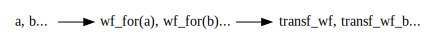

In [175]:
dgdisp("""
rankdir=LR
categories -> wfs_for_each_category -> transformed_wf_for_each_category 
categories [label="a, b..." shape=none]
wfs_for_each_category [label="wf_for(a), wf_for(b)..." shape=none]
transformed_wf_for_each_category [label="transf_wf, transf_wf_b..." shape=none]
""")

In [176]:
def creek_iterize(f, stream):
    m = Creek(stream)
    m.data_to_obj = f
    return m

def func_to_creek(func):
    return partial(creek_iterize, func)

In [177]:
stream = [1,2,3]
def double(item):
    return 2*item
f= double

list(func_to_creek(double)(stream))

[2, 4, 6]

# Transform mapping into a function

In [178]:
def dict_to_func(d):
    def f(item):
        try:
            return d[item]
        except KeyError:
            raise
    return f

def dict_as_param(func):
    def g(d):
        return func(**d)

    return g
    

In [179]:
g = dict_to_func(cat_map)

In [180]:
g('a')

[1, 2, 3]

## example on creek

In [181]:
src = 'aabbaab'
stream= func_to_creek(dict_to_func(cat_map))(src)
list(stream)

[[1, 2, 3], [1, 2, 3], [4, 5, 6], [4, 5, 6], [1, 2, 3], [1, 2, 3], [4, 5, 6]]

# Rewriting Christian's functions with creek

In [182]:
# Christian's initial function
def annot_timestamping(n_annot, start, end, wiggle=100):
    """
    Make synthetic timestamps
    """
    base = list(np.linspace(start, end, n_annot))
    wiggled = (
        base[0:1]
        + [i + np.random.randint(-wiggle, wiggle) for i in base[1:-1]]
        + base[-1:]
    )
    return wiggled



In [183]:
cat_lin_map = {
    'a': dict(start=1, stop=25, num=12),
    'b': dict(start=0, stop=5, num=30),
    }

In [184]:
src = 'aabbaab'
stream = Line(dict_to_func, func_to_creek)(cat_lin_map)(src)

In [185]:
list(stream)

[{'start': 1, 'stop': 25, 'num': 12},
 {'start': 1, 'stop': 25, 'num': 12},
 {'start': 0, 'stop': 5, 'num': 30},
 {'start': 0, 'stop': 5, 'num': 30},
 {'start': 1, 'stop': 25, 'num': 12},
 {'start': 1, 'stop': 25, 'num': 12},
 {'start': 0, 'stop': 5, 'num': 30}]

In [186]:
import numpy as np
p = Line(dict_as_param, func_to_creek)(np.linspace)

In [187]:
list(p(stream))[:3]

[array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
        11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
        22.81818182, 25.        ]),
 array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
        11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
        22.81818182, 25.        ]),
 array([0.        , 0.17241379, 0.34482759, 0.51724138, 0.68965517,
        0.86206897, 1.03448276, 1.20689655, 1.37931034, 1.55172414,
        1.72413793, 1.89655172, 2.06896552, 2.24137931, 2.4137931 ,
        2.5862069 , 2.75862069, 2.93103448, 3.10344828, 3.27586207,
        3.44827586, 3.62068966, 3.79310345, 3.96551724, 4.13793103,
        4.31034483, 4.48275862, 4.65517241, 4.82758621, 5.        ])]

In [188]:
dict_as_param(np.linspace)({'start': 1, 'stop': 25, 'num': 12})

array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
       11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
       22.81818182, 25.        ])

In [189]:
list(iterize(f)([1,2,3]))

[2, 4, 6]

In [190]:
# wiggle an array
def wiggle(arr, wig_factor):
    wiggling = np.random.randint(-wig_factor, wig_factor, len(arr)) 
    wiggling[0]=0
    wiggling[-1]=0
       
    return arr+wiggling

def wiggle_by(wig_factor):
    return partial(wiggle, wig_factor=wig_factor)


## package everything using lined

symbols -> Iterable[dict] -> Iterable[np.array] ---(wiggle each array)--> Iterable[np.array]

In [191]:
# This replaces the function annot_timestamping
src = 'aabbaab'
p1 = Line(dict_to_func, func_to_creek)(cat_lin_map)
stream = p1(src)
p2 = Line(dict_as_param, func_to_creek)(np.linspace)
stream_final = p2(stream)
list(stream_final)[:3]

[array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
        11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
        22.81818182, 25.        ]),
 array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
        11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
        22.81818182, 25.        ]),
 array([0.        , 0.17241379, 0.34482759, 0.51724138, 0.68965517,
        0.86206897, 1.03448276, 1.20689655, 1.37931034, 1.55172414,
        1.72413793, 1.89655172, 2.06896552, 2.24137931, 2.4137931 ,
        2.5862069 , 2.75862069, 2.93103448, 3.10344828, 3.27586207,
        3.44827586, 3.62068966, 3.79310345, 3.96551724, 4.13793103,
        4.31034483, 4.48275862, 4.65517241, 4.82758621, 5.        ])]